In [61]:
import pandas as pd
from pprint import pprint
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocess data in csv file from survey

In [ ]:
# with open("round2.csv", "r") as file:
#     df = pd.read_csv(file)

# df.drop(["Timestamp"], axis = 1, inplace=True)
# df.drop(list(df.filter(regex = 'If written by AI, please rewrite to make it sound more natural.')), axis = 1, inplace = True)
# df.columns = list(range(20))

# df.to_csv("round2.csv", index=False)

In [4]:
with open("round1.csv", "r") as file:
    df1 = pd.read_csv(file)
with open("round2.csv", "r") as file:
    df2 = pd.read_csv(file)

In [5]:
answer_list = [1 ,1 ,1 ,1 ,0 ,1 ,1 ,1 ,1 ,1 , 1 , 0 , 1 , 0 , 1 , 0 , 0 , 1 , 1 , 1]

In [65]:
# calculate accuracy
def calculate_accuracies(df, answer_list):

    row_accuracies = df.apply(lambda row: accuracy_score(answer_list, row.tolist()), axis=1)

    # print("Evaluator accuracies:")
    # print(row_accuracies.to_list())
    # print("Mean Accuracy: ", np.mean(row_accuracies))
    return row_accuracies
# precision_accuracies = df.apply(lambda row: precision_score(answer_list, row.tolist()), axis=1)
# recall_accuracies = df.apply(lambda row: recall_score(answer_list, row.tolist()), axis=1)

In [66]:
def compute_confusion_matrix(df, answer_list):
    """
    Compute a confusion matrix (TP, FP, TN, FN) for each column in a DataFrame against a list of true labels.

    Args:
        df (pd.DataFrame): DataFrame where each column represents predictions.
        answer_list (list): List of true labels (ground truth).

    Returns:
        pd.DataFrame: A DataFrame with columns ['TP', 'FP', 'TN', 'FN'] for each prediction set.
    """
    results = []

    # Loop through each column (predictions) in the DataFrame
    for row in df.index:
        # Calculate confusion matrix
        tn, fp, fn, tp = confusion_matrix(answer_list, df.iloc[row]).ravel()
        results.append({"TP": tp, "FP": fp, "TN": tn, "FN": fn})

    # Convert results to a DataFrame
    # print("Confusion matrix:")
    # print(pd.DataFrame(results))

    return pd.DataFrame(results)

## Given
0 = Human-gen\
1 = AI-gen

## SOOO...
TP = Predicted 1 (AI-written) and actually 1 (AI-written)\
FP = Predicted 1 (AI-written) but actually 0 (Human-written)\
TN = Predicted 0 (Human-written) and actually 0 (Human-written)\
FN = Predicted 0 (Human-written) but actually 1 (AI-written).

In [67]:
confusion_matrix_df = compute_confusion_matrix(df1, answer_list)
row_accuracies = calculate_accuracies(df1, answer_list)

print("Evaluator accuracies:")
print(row_accuracies.to_list())
print("Mean Accuracy: ", np.mean(row_accuracies))

print("Confusion matrix:")
print(pd.DataFrame(confusion_matrix_df))

Evaluator accuracies:
[0.5, 0.55, 0.35, 0.4, 0.65, 0.7, 0.45, 0.35, 0.4, 0.5, 0.6, 0.45, 0.4, 0.2]
Mean Accuracy:  0.46428571428571436
Confusion matrix:
    TP  FP  TN  FN
0    6   1   4   9
1    7   1   4   8
2    5   3   2  10
3    4   1   4  11
4    9   1   4   6
5   11   2   3   4
6    5   1   4  10
7    2   0   5  13
8    4   1   4  11
9    5   0   5  10
10   8   1   4   7
11   5   1   4  10
12   6   3   2   9
13   3   4   1  12


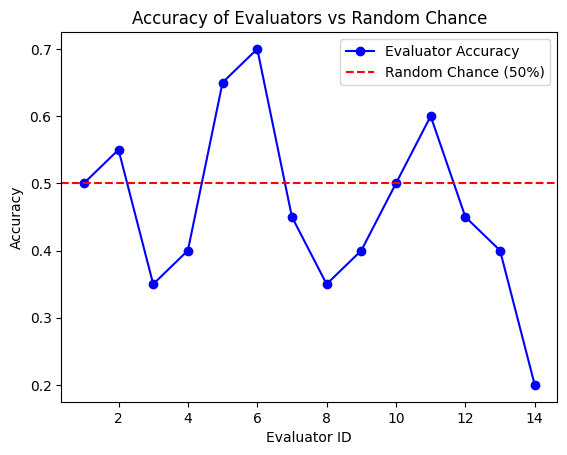

In [69]:
accuracies = row_accuracies.to_list()
evaluator_ids = range(1, len(accuracies) + 1)


# Plot line chart
plt.plot(evaluator_ids, accuracies, marker='o', label='Evaluator Accuracy', color='blue')
plt.axhline(y=0.5, color='red', linestyle='--', label='Random Chance (50%)')  # Random chance line
plt.title("Accuracy of Evaluators vs Random Chance")
plt.xlabel("Evaluator ID")
plt.ylabel("Accuracy")
plt.legend()
plt.show()